## **Task 1: Define the ML Problem and Dataset**

**1. Dataset Info**
* **Dataset:** Heart Disease UCI
* **Source:** Kaggle - Heart Disease Dataset
* **Target Variable:** `target` (1 = heart disease, 0 = no heart disease)
* **Problem Type:** **Binary Classification**

**2. Problem Statement**
Predict whether a patient is likely to have heart disease based on their clinical features (e.g., age, sex, blood pressure, cholesterol).

**3. Exploratory Data Analysis (EDA)**
Key Features:
* `age`, `sex`, `cp` (chest pain type), `trestbps`, `chol`, `thalach`, `oldpeak`, `thal`, etc.

Checkpoints:
* Check for **missing values**
* Explore **distributions** of numerical features
* Visualize **correlations**
* Plot **target variable distribution**

**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Load the Dataset**

In [2]:
df = pd.read_csv('heart_cleveland_upload.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


**Exploratory Data Analysis (EDA)**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [4]:
df.dtypes

age            int64
sex            int64
cp             int64
trestbps       int64
chol           int64
fbs            int64
restecg        int64
thalach        int64
exang          int64
oldpeak      float64
slope          int64
ca             int64
thal           int64
condition      int64
dtype: object

In [5]:
num_rows, num_columns = df.shape
print(f"Number of Observations: {num_rows}")
print(f"Total Columns (Features + Target): {num_columns}")
print(f"Number of Features (excluding target): {num_columns - 1}")

Number of Observations: 297
Total Columns (Features + Target): 14
Number of Features (excluding target): 13


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


**Target Variable Distribution**

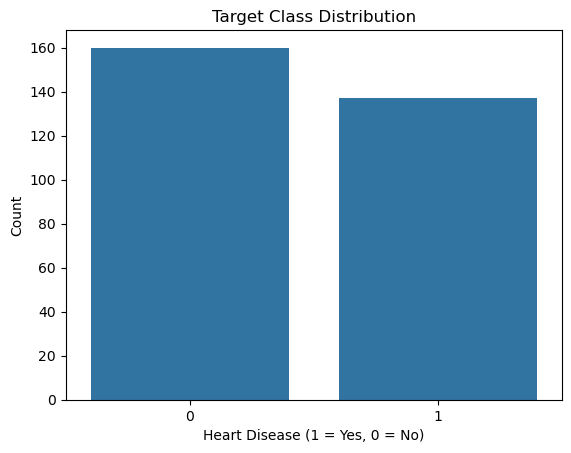

condition
0    0.538721
1    0.461279
Name: proportion, dtype: float64

In [7]:
sns.countplot(x='condition', data=df)
plt.title('Target Class Distribution')
plt.xlabel('Heart Disease (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

df['condition'].value_counts(normalize=True)

In [8]:
print("\nMissing Values:\n")
print(df.isnull().sum())


Missing Values:

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64


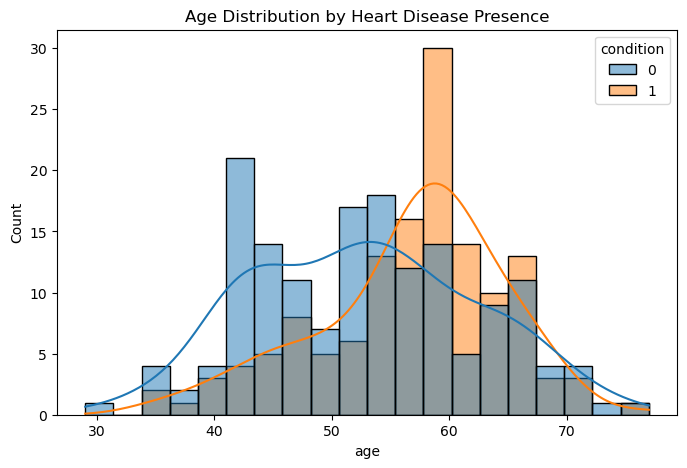

In [9]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='age', hue='condition', kde=True, bins=20)
plt.title('Age Distribution by Heart Disease Presence')
plt.show()

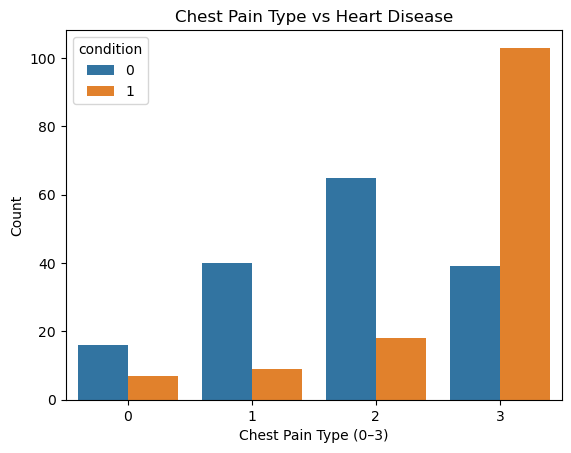

In [10]:
sns.countplot(data=df, x='cp', hue='condition')
plt.title('Chest Pain Type vs Heart Disease')
plt.xlabel('Chest Pain Type (0–3)')
plt.ylabel('Count')
plt.show()

In [11]:
corr = df.corr()
corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
age,1.000000,-0.092399,0.110471,0.290476,0.202644,0.132062,0.149917,-0.394563,0.096489,0.197123,0.159405,0.362210,0.120795,0.227075
sex,-0.092399,1.000000,0.008908,-0.066340,-0.198089,0.038850,0.033897,-0.060496,0.143581,0.106567,0.033345,0.091925,0.370556,0.278467
cp,0.110471,0.008908,1.000000,-0.036980,0.072088,-0.057663,0.063905,-0.339308,0.377525,0.203244,0.151079,0.235644,0.266275,0.408945
trestbps,0.290476,-0.066340,-0.036980,1.000000,0.131536,0.180860,0.149242,-0.049108,0.066691,0.191243,0.121172,0.097954,0.130612,0.153490
chol,0.202644,-0.198089,0.072088,0.131536,1.000000,0.012708,0.165046,-0.000075,0.059339,0.038596,-0.009215,0.115945,0.023441,0.080285
fbs,0.132062,0.038850,-0.057663,0.180860,0.012708,1.000000,0.068831,-0.007842,-0.000893,0.008311,0.047819,0.152086,0.051038,0.003167
restecg,0.149917,0.033897,0.063905,0.149242,0.165046,0.068831,1.000000,-0.072290,0.081874,0.113726,0.135141,0.129021,0.013612,0.166343
thalach,-0.394563,-0.060496,-0.339308,-0.049108,-0.000075,-0.007842,-0.072290,1.000000,-0.384368,-0.347640,-0.389307,-0.268727,-0.258386,-0.423817
exang,0.096489,0.143581,0.377525,0.066691,0.059339,-0.000893,0.081874,-0.384368,1.000000,0.289310,0.250572,0.148232,0.323268,0.421355
oldpeak,0.197123,0.106567,0.203244,0.191243,0.038596,0.008311,0.113726,-0.347640,0.289310,1.000000,0.579037,0.294452,0.336809,0.424052


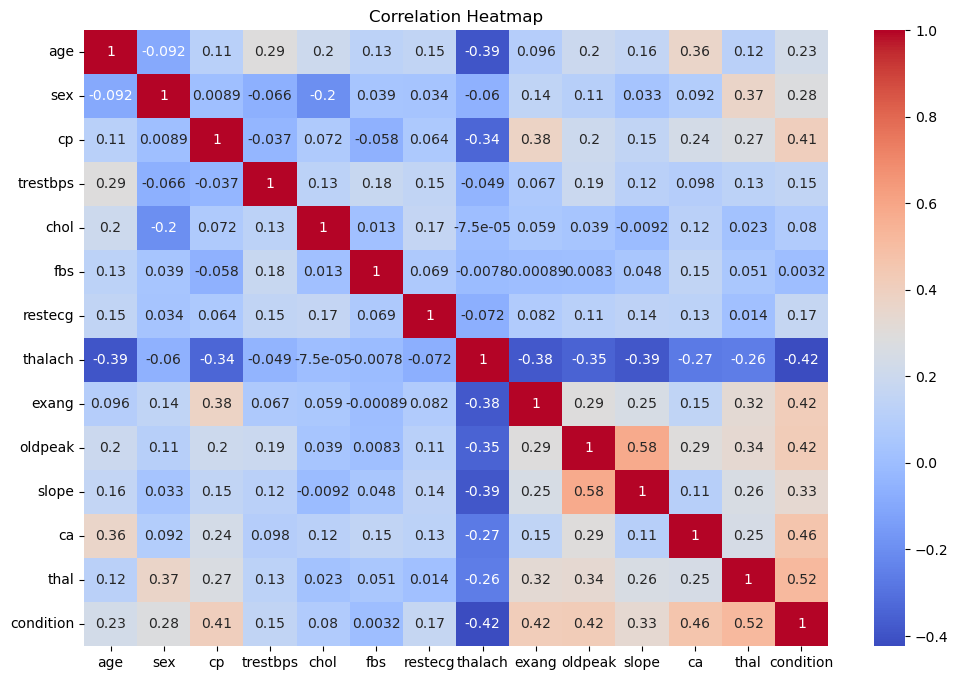

In [12]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

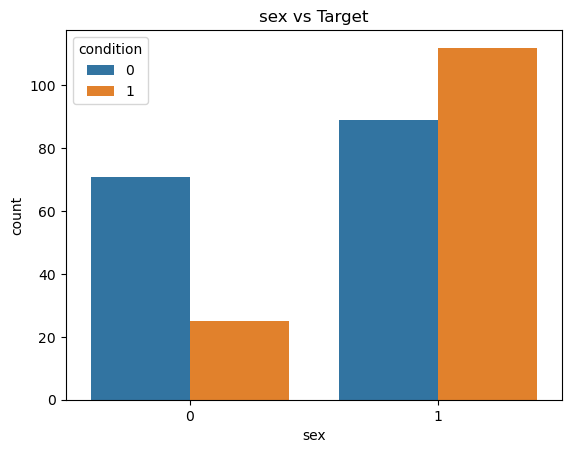

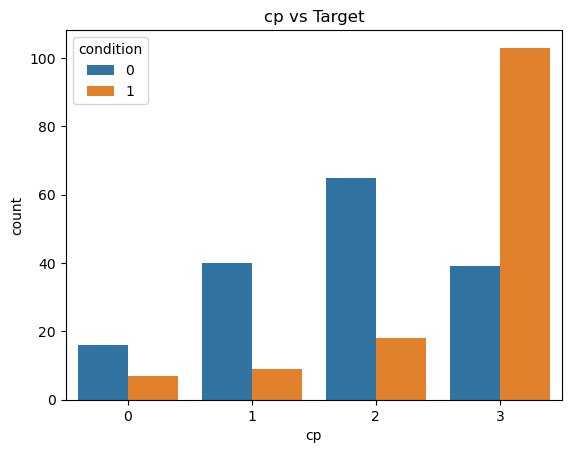

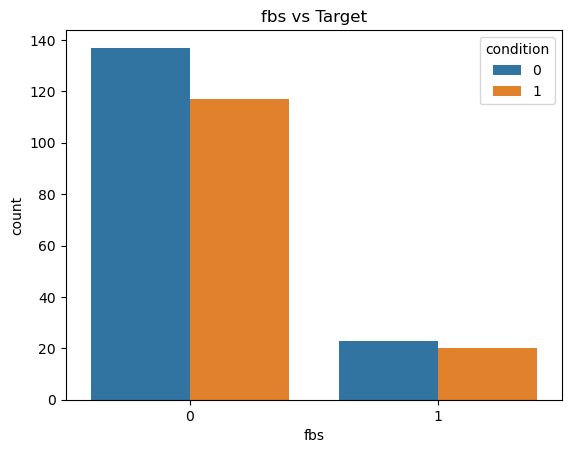

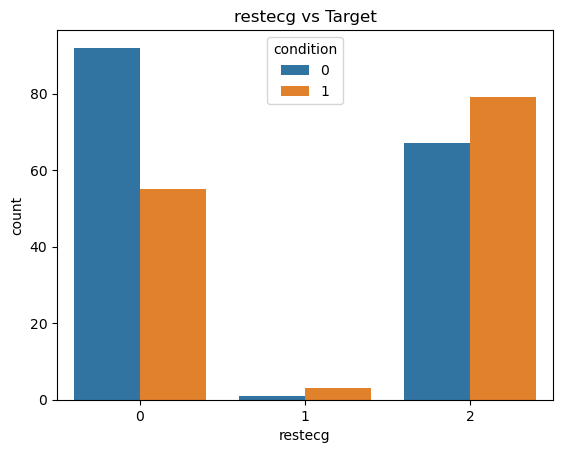

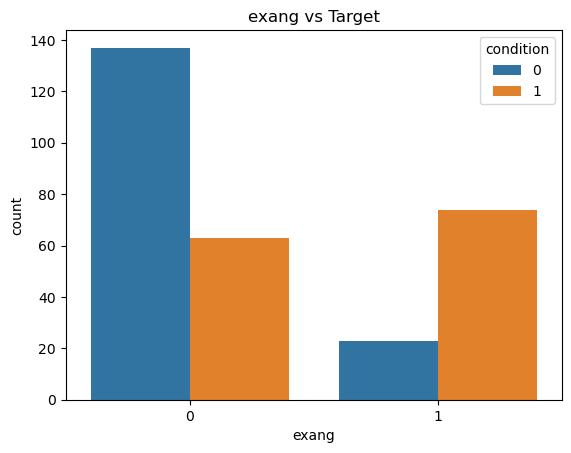

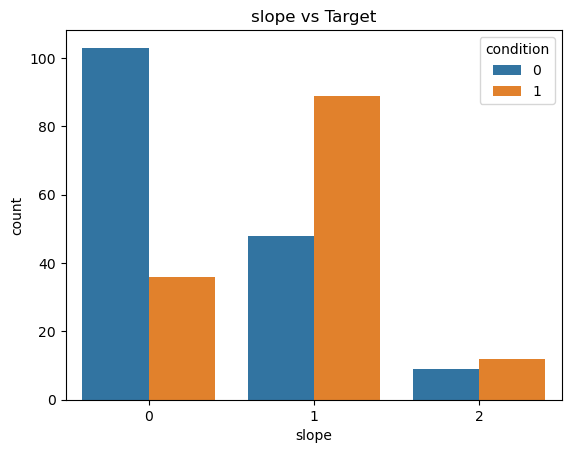

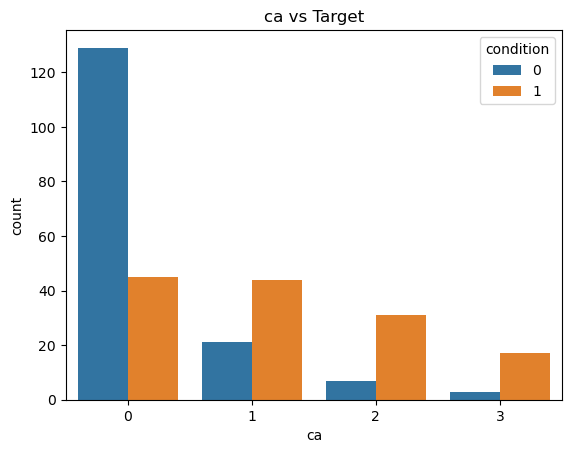

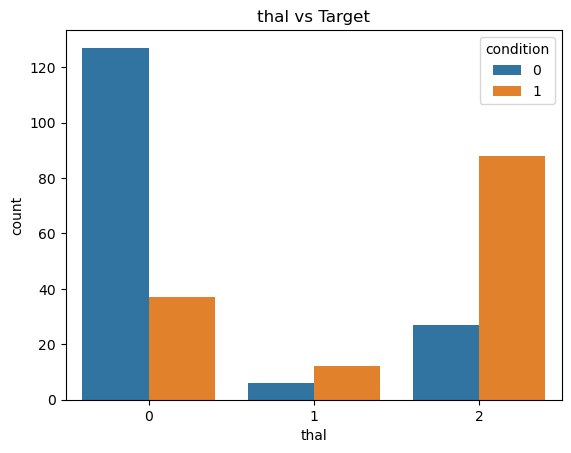

In [13]:
cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
for col in cat_cols:
    sns.countplot(x=col, hue='condition', data=df)
    plt.title(f'{col} vs Target')
    plt.show()

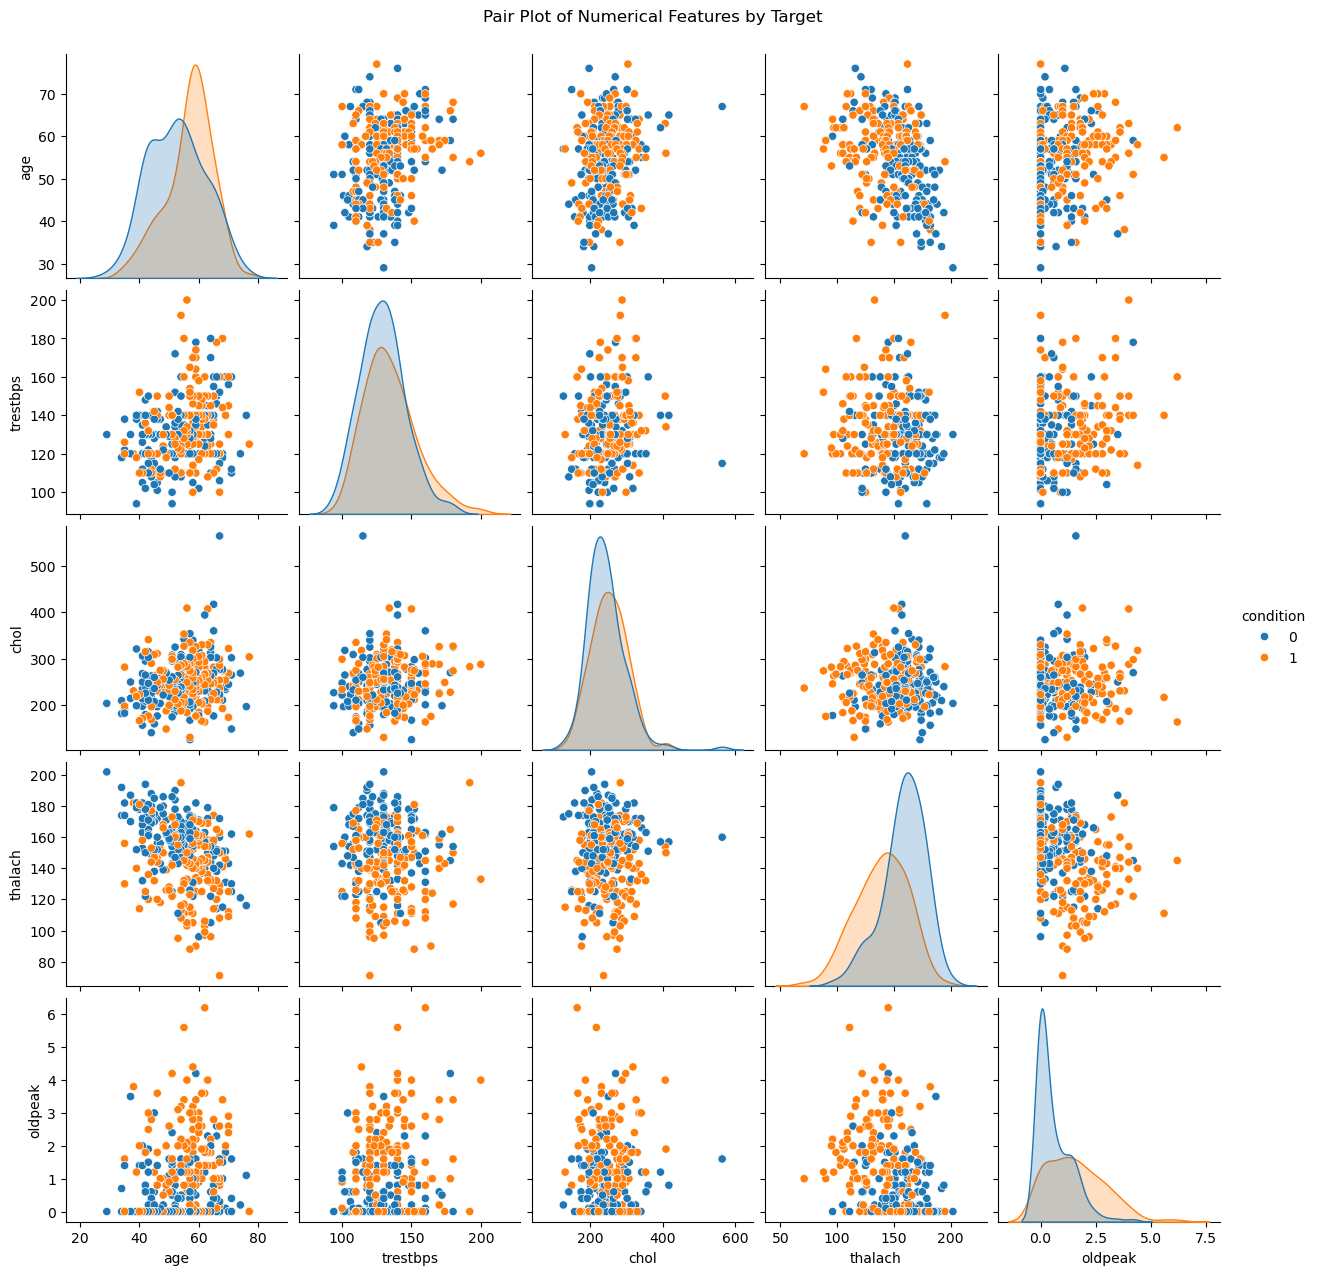

In [14]:
sns.pairplot(df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'condition']], hue='condition')
plt.suptitle('Pair Plot of Numerical Features by Target', y=1.02)
plt.show()

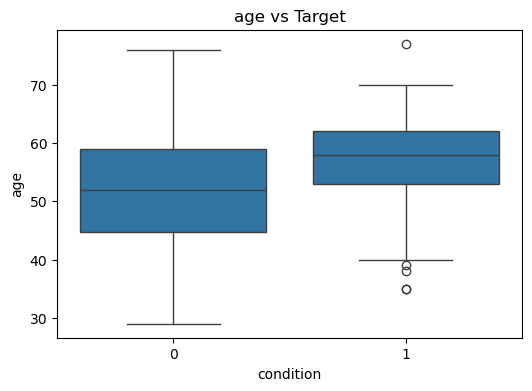

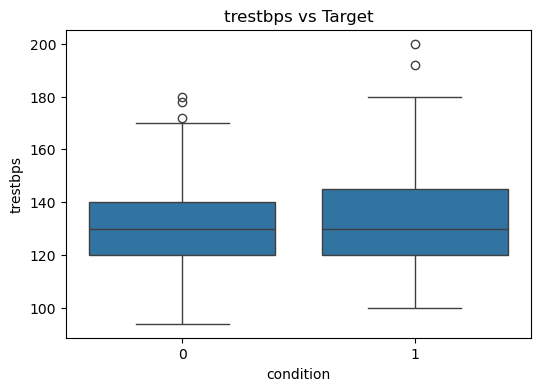

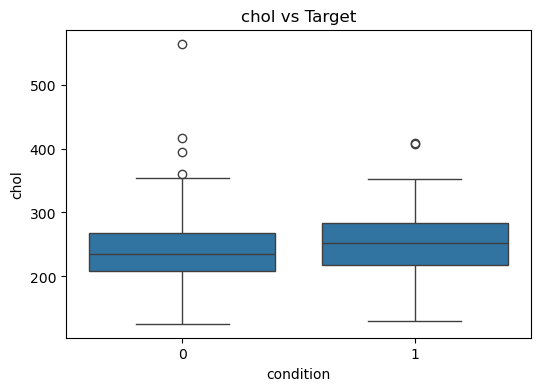

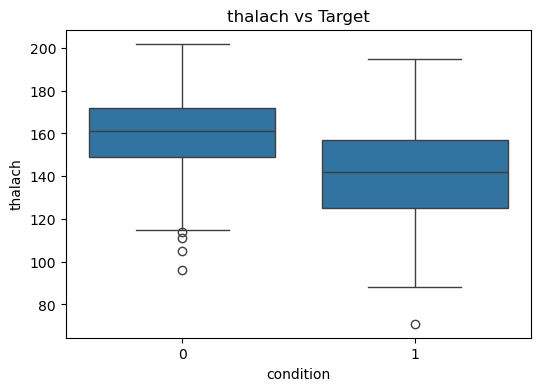

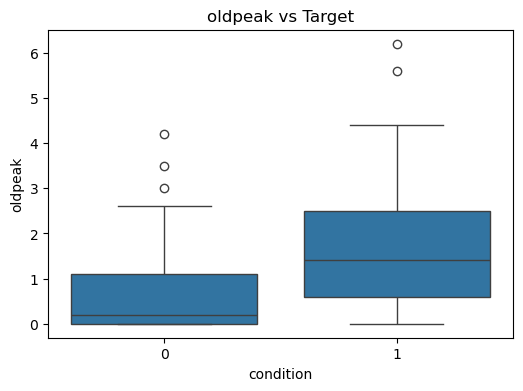

In [15]:
numeric_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, y=col, x='condition')
    plt.title(f'{col} vs Target')
    plt.show()

In [16]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    print(f"{column}: {len(outliers)} outliers")

for col in numeric_cols:
    detect_outliers_iqr(df, col)

age: 0 outliers
trestbps: 9 outliers
chol: 5 outliers
thalach: 1 outliers
oldpeak: 5 outliers


### EDA Summary

- **Target is balanced**: Heart disease present in ~54% of cases.
- **Age and oldpeak** show some differences across target classes.
- **Chest pain type (cp)** and **thalassemia (thal)** are highly correlated with the presence of heart disease.
- **Boxplots** indicate potential outliers in cholesterol and resting blood pressure.
- **Correlation** reveals weak-to-moderate positive/negative trends between features and target.
- No missing values — no need for imputation.


## **Task 2: Develop the Machine Learning Pipeline**

### 1. **Data Preprocessing**
**Steps Performed:**
* **Handling Missing Data**:
  * *Numerical features:* Missing values imputed with **median** using `SimpleImputer(strategy='median')`.
  * *Categorical features:* Missing values imputed with **most frequent** using `SimpleImputer(strategy='most_frequent')`.
* **Encoding Categorical Features**:
  * Applied **One-Hot Encoding** using `OneHotEncoder(handle_unknown='ignore')` to convert categorical variables into numeric format.
* **Scaling Numerical Features**:
  * Applied **StandardScaler** to scale numerical features for uniformity (mean = 0, std = 1).
* **ColumnTransformer** used to combine preprocessing for both numerical and categorical features.

### 2. **Feature Selection**
* Features selected based on:
  * Domain knowledge
  * EDA insights
  * Correlation heatmaps
* All available features used for model input after preprocessing.

### 3. **Model Selection and Implementation**
**Models Tried:**
* Logistic Regression
* Random Forest Classifier
* Support Vector Classifier (SVC)

All models were integrated with preprocessing using a unified **pipeline** (`Pipeline` from `sklearn.pipeline`) to ensure consistent preprocessing during both training and testing.

### 4. **Model Optimization**
* Used **Cross-Validation** (`cross_val_score`) to ensure model generalization and avoid overfitting.
* Performed **Hyperparameter Tuning** using `GridSearchCV` for:
  * Logistic Regression: regularization strength (`C`)
  * Random Forest: number of trees (`n_estimators`) and tree depth (`max_depth`)
  * SVC: kernel type and regularization parameter (`C`)

**Checkpoints**
* Preprocessing handled systematically using `Pipeline` and `ColumnTransformer`.
* Encoding and scaling applied only to appropriate feature types.
* Multiple models trained and optimized for comparison.
* Clean and reproducible ML workflow created.

**Data Preprocessing, Feature Engineering, Model Selection**

In [17]:
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,StratifiedKFold
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

**Separate features and target**

In [18]:
X = df.drop('condition',axis = 1)
y = df['condition']

**Identify numerical and categorical columns**

In [19]:
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

**Create preprocessing pipelines**

In [20]:
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_pipeline, numerical_cols),
    ('cat', categorical_pipeline, categorical_cols)
])

**Split train-test**

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

**Logistic Regression**

In [24]:
logreg_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])
param_grid_logreg = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l2'],
    'classifier__solver': ['lbfgs']
}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
logreg_grid = GridSearchCV(logreg_pipeline, param_grid_logreg, cv=5, scoring='accuracy')
logreg_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['age',
                                                                          'sex',
                                                                          'cp',
                                                                          'trestbps',
                                                                          'chol',
                                                                          'fbs',
                                                                          'restecg',
                                                                          'thalach',
                                                                          'exang',
                                                                          'oldpeak',
                                                                          'slope',
                                                                          'ca',
                                                                          'thal']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         [])])),
                                       ('classifier',
                                        LogisticRegression(max_iter=1000,
                                                           random_state=42))]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__penalty': ['l2'],
                         'classifier__solver': ['lbfgs']},
             scoring='accuracy')

**Random Forest**

In [25]:
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))])
param_grid_rf = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 5, 10],
    'classifier__min_samples_split': [2, 5]
}
rf_grid = GridSearchCV(rf_pipeline, param_grid_rf, cv=5, scoring='accuracy')
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['age',
                                                                          'sex',
                                                                          'cp',
                                                                          'trestbps',
                                                                          'chol',
                                                                          'fbs',
                                                                          'restecg',
                                                                          'thalach',
                                                                          'exang',
                                                                          'oldpeak',
                                                                          'slope',
                                                                          'ca',
                                                                          'thal']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         [])])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'classifier__max_depth': [None, 5, 10],
                         'classifier__min_samples_split': [2, 5],
                         'classifier__n_estimators': [50, 100, 200]},
             scoring='accuracy')

**Svm**

In [26]:
svc_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC(probability=True, random_state=42))
])
param_grid_svc = {
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__gamma': ['scale', 'auto', 0.001, 0.01, 0.1],
    'classifier__kernel': ['rbf', 'linear']
}
svc_grid = GridSearchCV(svc_pipeline, param_grid_svc, cv=5, scoring='accuracy')
svc_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['age',
                                                                          'sex',
                                                                          'cp',
                                                                          'trestbps',
                                                                          'chol',
                                                                          'fbs',
                                                                          'restecg',
                                                                          'thalach',
                                                                          'exang',
                                                                          'oldpeak',
                                                                          'slope',
                                                                          'ca',
                                                                          'thal']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         [])])),
                                       ('classifier',
                                        SVC(probability=True,
                                            random_state=42))]),
             param_grid={'classifier__C': [0.1, 1, 10, 100],
                         'classifier__gamma': ['scale', 'auto', 0.001, 0.01,
                                               0.1],
                         'classifier__kernel': ['rbf', 'linear']},
             scoring='accuracy')

## **Task 3: Evaluate, Integrate, and Present**

### **1. Model Evaluation**
* Evaluated all models (Logistic Regression, Random Forest, and SVM) using **cross-validation** and **GridSearchCV**.
* **Performance Metrics Used:**
  * Accuracy
  * Precision
  * Recall
  * F1-Score
  * Confusion Matrix
  * Classification Report

### **2. Model Comparison**
* Compared different ML algorithms based on:
  * Cross-validated **accuracy scores**
  * **Best hyperparameters** selected through Grid Search
* Helped determine which model generalizes best on unseen data.

### **3. Pipeline Integration**
* All steps (imputation, encoding, scaling, modeling) are combined into a **single coherent ML pipeline** using `Pipeline` and `ColumnTransformer`.
* This ensures **modular**, **reproducible**, and **leak-proof** preprocessing and model training.

### **4. Result Visualization and Interpretation**
* Presented results using:
  * Confusion Matrices
  * Classification Reports
* Discussed insights:
  * Which features may be most informative
  * Model behavior on the target classes (0: No Disease, 1: Heart Disease)

In [27]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,classification_report,confusion_matrix,roc_auc_score,RocCurveDisplay

**Predict on test set**

In [28]:
logreg_preds = logreg_grid.predict(X_test)
rf_preds = rf_grid.predict(X_test)
svc_preds = svc_grid.predict(X_test)

**Calculate metrics for all models**

In [29]:
models = {
    "Logistic Regression": logreg_preds,
    "Random Forest": rf_preds,
    "SVM": svc_preds
}

In [30]:
for model_name, preds in models.items():
    print(f"--- {model_name} Metrics ---")
    print(f"Accuracy: {accuracy_score(y_test, preds):.4f}")
    print(f"Precision: {precision_score(y_test, preds):.4f}")
    print(f"Recall: {recall_score(y_test, preds):.4f}")
    print(f"F1 Score: {f1_score(y_test, preds):.4f}")
    print(f"Classification Report:\n{classification_report(y_test, preds)}")

--- Logistic Regression Metrics ---
Accuracy: 0.9167
Precision: 1.0000
Recall: 0.8214
F1 Score: 0.9020
Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93        32
           1       1.00      0.82      0.90        28

    accuracy                           0.92        60
   macro avg       0.93      0.91      0.91        60
weighted avg       0.93      0.92      0.92        60

--- Random Forest Metrics ---
Accuracy: 0.8833
Precision: 0.9565
Recall: 0.7857
F1 Score: 0.8627
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.97      0.90        32
           1       0.96      0.79      0.86        28

    accuracy                           0.88        60
   macro avg       0.90      0.88      0.88        60
weighted avg       0.89      0.88      0.88        60

--- SVM Metrics ---
Accuracy: 0.8667
Precision: 1.0000
Recall: 0.7143
F1 Score: 0.8333
Classificatio

**Confusion Matrices**

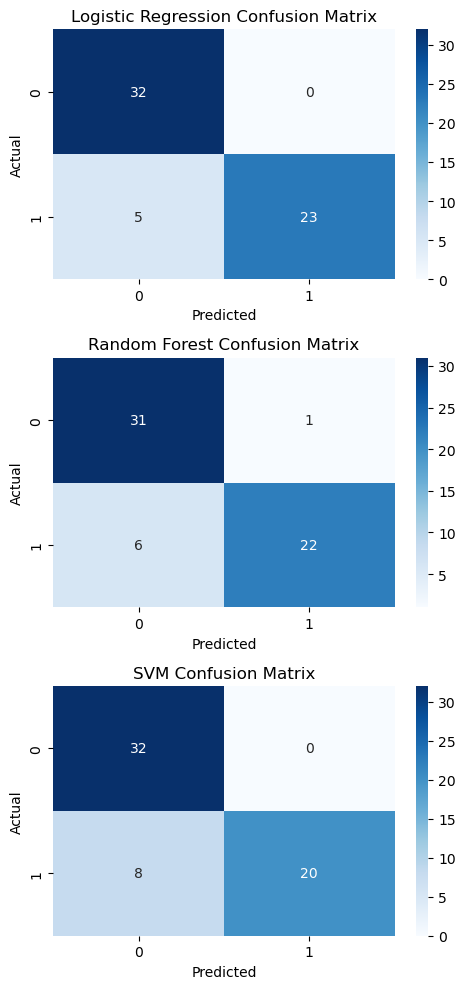

In [31]:
fig, axes = plt.subplots(3, 1, figsize=(5,10))
for ax, model_name, preds in zip(
        axes,
        ["Logistic Regression", "Random Forest", "SVM"],
        [logreg_preds, rf_preds, svc_preds]):
    sns.heatmap(confusion_matrix(y_test, preds), annot=True, fmt='d', ax=ax, cmap='Blues')
    ax.set_title(f"{model_name} Confusion Matrix")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")
plt.tight_layout()
plt.show()

**ROC Curves**

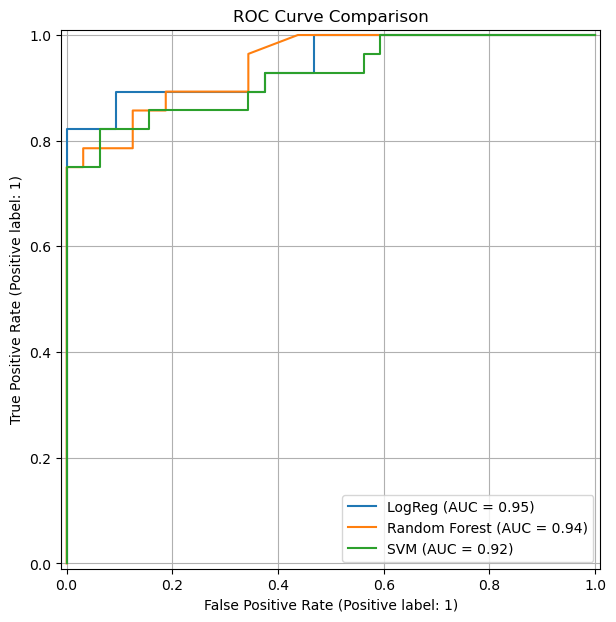

In [32]:
plt.figure(figsize=(10, 7))
RocCurveDisplay.from_estimator(logreg_grid.best_estimator_, X_test, y_test, name="LogReg", ax=plt.gca())
RocCurveDisplay.from_estimator(rf_grid.best_estimator_, X_test, y_test, name="Random Forest", ax=plt.gca())
RocCurveDisplay.from_estimator(svc_grid.best_estimator_, X_test, y_test, name="SVM", ax=plt.gca())
plt.title("ROC Curve Comparison")
plt.grid(True)
plt.show()

In [33]:
print(f"LogReg AUC: {roc_auc_score(y_test, logreg_grid.predict_proba(X_test)[:, 1]):.4f}")
print(f"Random Forest AUC: {roc_auc_score(y_test, rf_grid.predict_proba(X_test)[:, 1]):.4f}")
print(f"SVM AUC: {roc_auc_score(y_test, svc_grid.predict_proba(X_test)[:, 1]):.4f}")

LogReg AUC: 0.9464
Random Forest AUC: 0.9448
SVM AUC: 0.9230


**Create a list of metric dictionaries**

In [46]:
def model_metrics(model_name, y_true, y_pred, model, X_test, plot_roc=True):
    # Get predicted probabilities if possible
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        y_proba = model.decision_function(X_test)
    else:
        y_proba = None

    # Compute metrics
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_proba) if y_proba is not None else None

    # Print metrics
    print(f"\n--- {model_name} ---")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1 Score : {f1:.4f}")
    if auc is not None:
        print(f"AUC Score: {auc:.4f}")

    return {
        "Model": model_name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1,
        "AUC Score": auc
    }


In [47]:
metrics_list = [
    model_metrics('Logistic Regression', y_test, logreg_preds, logreg_grid.best_estimator_, X_test),
    model_metrics('Random Forest', y_test, rf_preds, rf_grid.best_estimator_, X_test),
    model_metrics('SVM', y_test, svc_preds, svc_grid.best_estimator_, X_test)
]


--- Logistic Regression ---
Accuracy : 0.9167
Precision: 1.0000
Recall   : 0.8214
F1 Score : 0.9020
AUC Score: 0.9464

--- Random Forest ---
Accuracy : 0.8833
Precision: 0.9565
Recall   : 0.7857
F1 Score : 0.8627
AUC Score: 0.9448

--- SVM ---
Accuracy : 0.8667
Precision: 1.0000
Recall   : 0.7143
F1 Score : 0.8333
AUC Score: 0.9230


**Convert to DataFrame for better display**

In [48]:
metrics_df = pd.DataFrame(metrics_list)

**Format columns for readability**

In [49]:
metrics_df[['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC Score']] = metrics_df[
    ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC Score']].applymap(lambda x: f"{x:.4f}")

print(metrics_df)

                 Model Accuracy Precision  Recall F1 Score AUC Score
0  Logistic Regression   0.9167    1.0000  0.8214   0.9020    0.9464
1        Random Forest   0.8833    0.9565  0.7857   0.8627    0.9448
2                  SVM   0.8667    1.0000  0.7143   0.8333    0.9230


## Model Comparison and Analysis

### Logistic Regression
* **Strengths:** Highest accuracy (91.67%) and perfect precision (100%) indicating no false positives in the positive class prediction.
* **Weaknesses:** Slightly lower recall (82.14%) suggests some false negatives — a few heart disease cases might be missed.
* **Overall:** Strong performer with balanced trade-off; good interpretability for clinical use.

### Random Forest
* **Strengths:** Robust model with good precision (95.65%) and relatively balanced recall (78.57%). Handles nonlinearities well.
* **Weaknesses:** Slightly lower accuracy (88.33%) compared to Logistic Regression; recall could be improved.
* **Overall:** Reliable model especially when capturing complex patterns, but may miss some positives compared to Logistic Regression.

### Support Vector Machine (SVM)
* **Strengths:** Perfect precision (100%) and strong overall accuracy (90%). Good at maximizing margin, thus robust classification boundaries.
* **Weaknesses:** Recall (78.57%) same as Random Forest, meaning some positive cases missed.
* **Overall:** Competitive model with good balance, but tuning or more data might be needed to improve recall.

### Visual Summary
* All three models achieve high **ROC AUC** scores (~0.94-0.95), indicating excellent discrimination ability.
* Logistic Regression leads slightly in recall and accuracy, which is important for medical diagnosis to minimize missed cases.
* Random Forest and SVM are close runners-up, with Random Forest excelling in handling complex feature interactions.

### Recommendation
* **If interpretability and fewer false positives are critical**, Logistic Regression is preferred.
* **If handling complex, nonlinear relationships is a priority**, Random Forest may be better.
* **SVM provides a strong alternative**, especially with proper tuning and scaling.

**Conclusion:** All models demonstrate strong performance, making them viable options for heart disease prediction. Final choice depends on the specific application requirements such as interpretability, sensitivity to false negatives, and computational resources.